
# <p style="text-align: center;">MIS 382: Advanced Predictive Modelling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 60</p>
## <p style="text-align: center;">Due: Wednesday, November 8th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for all students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1 - Bayesian Classifiers (15 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Bayesian classifiers (LDA, QDA and Naive Bayes) The code below loads the dataset and all necessary sklearn modules. Look up any module on the scikit-learn website for a full description.

1. Train Linear Discriminant Analysis, Quadratic Discriminant Analysis, and (Gaussian) Naive Bayes. Extract the probability of the class being digits 8 or digits 9 for every row. 
2. Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line) 
3. Report the area under the ROC curve (AUC) for each model. (5 pts for each model. Total of 15 pts)

In [12]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata(
    "MNIST original", data_home='./dataset/'
)  # data downloaded in'./dataset/', change if necessary

X = (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [14]:
idx = (y_train == 8) + (y_train == 9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train - 8)

idx = (y_test == 8) + (y_test == 9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test - 8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800, 784), (11800,), (1983, 784), (1983,))


## Solutions

In [15]:
def plot_roc_curve(fpr, npr, label=None, auc=None):
    plt.plot(fpr, tpr, linewidth=2, label=label + str(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

AUC socre for LDA is  0.993605802399
AUC socre for QDA is  0.97415254496
AUC socre for Naive Bayes is  0.972163261651


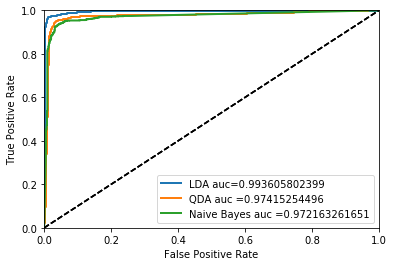

In [16]:
plt.figure(0).clf()

LDA_clf = LDA()
LDA_clf.fit(X_train, y_train)
LDA_y_predicted = LDA_clf.predict(X_test)
LDA_prob = LDA_clf.predict_proba(X_test)
LDA_y_score = LDA_clf.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, LDA_y_score)
auc = roc_auc_score(y_test, LDA_y_score)
plot_roc_curve(fpr, tpr, 'LDA auc=', auc)
print 'AUC socre for LDA is ', str(auc)

QDA_clf = QDA()
QDA_clf.fit(X_train, y_train)
QDA_y_predicted = QDA_clf.predict(X_test)
QDA_prob = QDA_clf.predict_proba(X_test)
QDA_y_score = QDA_clf.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, QDA_y_score)
auc = roc_auc_score(y_test, QDA_y_score)
plot_roc_curve(fpr, tpr, 'QDA auc =', auc)
print 'AUC socre for QDA is ', str(auc)

NB_clf = GaussianNB()
NB_clf.fit(X_train, y_train)
NB_y_predicted = NB_clf.predict(X_test)
NB_y_prob = -(NB_clf.predict_proba(X_test))
'''
here since the dight=8 is class 0 in data set but we want it be the positive class, I just use the negative of
that as the score(if I use NB_y_prob[:,1] it would be all 1 and 0 and if I use 1-NB_y_prob[:,0], it would be 1 and 0 also)
due to they are all floats that really close to 1 and 0
'''

fpr, tpr, thresholds = roc_curve(y_test, NB_y_prob[:, 0])
auc = roc_auc_score(y_test, NB_y_prob[:, 0])
plot_roc_curve(fpr, tpr, 'Naive Bayes auc =', auc)
print 'AUC socre for Naive Bayes is ', str(auc)

plt.legend(loc=0)

### Probabilities for calss = 8 and class = 9:

In [17]:
LDA_prob

array([[  9.99740516e-01,   2.59484124e-04],
       [  9.99999830e-01,   1.69840181e-07],
       [  9.99978789e-01,   2.12106777e-05],
       ..., 
       [  2.82800672e-09,   9.99999997e-01],
       [  5.97602137e-08,   9.99999940e-01],
       [  1.59061098e-09,   9.99999998e-01]])

In [18]:
QDA_prob

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [19]:
NB_y_prob

array([[ -1.00000000e+000,  -0.00000000e+000],
       [ -1.00000000e+000,  -0.00000000e+000],
       [ -1.00000000e+000,  -0.00000000e+000],
       ..., 
       [ -4.29907815e-178,  -1.00000000e+000],
       [ -2.35127896e-114,  -1.00000000e+000],
       [ -1.72617317e-182,  -1.00000000e+000]])

# Question 2: Bayesian Networks (10 pts)
In the Bayesian Network shown below, the nodes represent the following random variables: S stands for "Smoking", LC for "Lung Cancer", B for "Bronchitis", T for "Tuberculosis", D for "Dyspnea". The necessary conditional probabilities are provided alongside. 

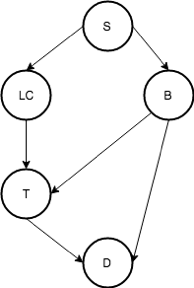

In [20]:
from IPython.display import Image
Image(filename='BayesianNetworks.png')

$$Pr(S = yes) = 0.1$$
$$Pr(LC = yes | S = yes) = 0.03$$
$$Pr(LC = yes | S = no) = 0.01$$
$$Pr(B = yes | S = yes) = 0.06$$
$$Pr(B = yes | S = no) = 0.02$$
$$Pr(T = yes | LC = yes, B = yes) = 0.8$$
$$Pr(T = yes | LC = yes, B = no) = 0.5$$
$$Pr(T = yes | LC = no, B = yes) = 0.1$$
$$Pr(T = yes | LC = no, B = no) = 0.04$$
$$Pr(D = yes | T = yes, B = yes) = 0.9$$
$$Pr(D = yes | T = yes, B = no) = 0.7$$
$$Pr(D = yes | T = no, B = yes) = 0.65$$
$$Pr(D = yes | T = no, B = no) = 0.015$$

Compute the following probabilities:

(a) (2 pts) $Pr(D = yes)$

(b) (2 pts) $Pr(LC = no, B = yes, D = yes)$

(c) (3 pts) Given that a person has Bronchitis (B = yes) and no Lung Cancer (LC = no), the probability he will has symptoms of Dyspnea (D = yes).

(d) (3 pts) Given that a person is a smoker (S = yes), the probability he will get infected with Tuberculosis (T = yes).

## Solutions

## (a)

Given S, we have LC and B independent:<br>
$Pr(LC = yes ,B=yes)$<br>
$=Pr(LC = yes ,B=yes| S = yes) *Pr(S=yes)+Pr(LC = yes ,B=yes| S = no) *Pr(S=no)$
$= Pr(LC = yes | S = yes)*Pr(B=yes|S=yes)*Pr(S=yes)+Pr(LC = yes | S = no)*Pr(B=yes|S=no)*Pr(S=no)$
$=0.03*0.06*0.1+0.01*0.02*(1-0.1)=0.00036$

$Pr(LC = yes ,B=no)$<br>
$=Pr(LC = yes ,B=no| S = yes) *Pr(S=yes)+Pr(LC = yes ,B=no| S = no) *Pr(S=no)$
$= Pr(LC = yes | S = yes)*Pr(B=no|S=yes)*Pr(S=yes)+Pr(LC = yes | S = no)*Pr(B=no|S=no)*Pr(S=no)$
$=0.03*(1-0.06)*0.1+0.01*(1-0.02)*(1-0.1)=0.01164$

$Pr(LC = no ,B=yes)$<br>
$=Pr(LC = no ,B=yes| S = yes) *Pr(S=yes)+Pr(LC = no ,B=yes| S = no) *Pr(S=no)$
$= Pr(LC = no | S = yes)*Pr(B=yes|S=yes)*Pr(S=yes)+Pr(LC = no | S = no)*Pr(B=yes|S=no)*Pr(S=no)$
$=(1-0.03)*0.06*0.1+(1-0.01)*0.02*(1-0.1)=0.02364$

$Pr(LC = no ,B=no)$<br>
$=Pr(LC = no ,B=no| S = yes) *Pr(S=yes)+Pr(LC = no ,B=no| S = no) *Pr(S=no)$
$= Pr(LC = no | S = yes)*Pr(B=no|S=yes)*Pr(S=yes)+Pr(LC = no | S = no)*Pr(B=no|S=no)*Pr(S=no)$
$=(1-0.03)*(1-0.06)*0.1+(1-0.01)*(1-0.02)*(1-0.1)=0.96436$


Then we can calculate that:<br><br>
$Pr(T=yes,B=yes)$<br>
$=Pr(T=yes,LC=yes,B=yes)+Pr(T=yes,LC=no,B=yes)$
$=Pr(T=yes|LC=yes,B=yes)*Pr(LC=yes,B=yes)+Pr(T=yes|LC=no,B=yes)*Pr(LC=no,B=yes)$
$=0.8*0.00036+0.1*0.02364=0.002652$


$Pr(T=no,B=yes)$<br>
$=Pr(T=no,LC=yes,B=yes)+Pr(T=no,LC=no,B=yes)$
$=Pr(T=no|LC=yes,B=yes)*Pr(LC=yes,B=yes)+Pr(T=no|LC=no,B=yes)*Pr(LC=no,B=yes)$
$=(1-0.8)*0.00036+(1-0.1)*0.02364=0.021348$


$Pr(T=yes,B=no)$<br>
$=Pr(T=yes,LC=yes,B=no)+Pr(T=yes,LC=no,B=no)$
$=Pr(T=yes|LC=yes,B=no)*Pr(LC=yes,B=no)+Pr(T=yes|LC=no,B=no)*Pr(LC=no,B=no)$
$=0.5*0.01164+0.04*0.96436=0.0443944$


$Pr(T=no,B=no)$<br>
$=Pr(T=no,LC=yes,B=no)+Pr(T=no,LC=no,B=no)$
$=Pr(T=no|LC=yes,B=no)*Pr(LC=yes,B=no)+Pr(T=no|LC=no,B=no)*Pr(LC=no,B=no)$
$=(1-0.5)*0.01164+(1-0.04)*0.96436=0.9316056$

What we want is $Pr(D=yes)$ which is the sum of the following four probabilities:<br><br>
$Pr(D=yes)$<br>
$=Pr(D=yes,T=yes,B=yes)+Pr(D=yes,T=no,B=yes)+Pr(D=yes,T=yes,B=no)+Pr(D=yes,T=no,B=no)$
$=Pr(D=yes|T=yes,B=yes)*Pr(T=yes,B=yes)+Pr(D=yes|T=no,B=yes)*Pr(T=no,B=yes)+Pr(D=yes|T=yes,B=no)*Pr(T=yes,B=no)+Pr(D=yes|T=no,B=no)*Pr(T=no,B=no)$
$=0.9*0.002652+0.65*0.021348+0.7*0.0443944+0.015*0.9316056=0.061313164 \approx 0.0613$

$So\ we\ have\ Pr(D = yes) = 0.0613 $

## (b)


Since B is independent from LC so we can have:<br>
$Pr(LC=no, B=yes, D=yes) $<br>
$=Pr(LC=no, B=yes, ,T=yes,D=yes)+Pr(LC=no, B=yes, T=no,D=yes)$
$=Pr(LC=not,B=yes)*Pr(T=yes|LC=no,B=yes)*Pr(D=yes|T=yes,B=yes)+Pr(LC=not,B=yes)*Pr(T=no|LC=no,B=yes)*Pr(D=yes|T=no,B=yes)$
$=0.02364*0.1*0.9+0.02364*(1-0.1)*0.65=0.015957$<br>
(Based on what we have calculated in question a)<br><br>
$So\ we\ have\ Pr(LC=no, B=yes, D=yes) = 0.015957 $

## (C)

$ Pr(D=yes | B=yes, LC=no) = \cfrac{Pr(D=yes, B=yes, LC=no)}{Pr(B=yes, LC=no)}=\cfrac{0.015957}{0.023712}=0.67295040485$

## (d)


Based on the network we have:

$Pr(T=yes,S=yes)$<br>
$=Pr(S=yes,LC=yes,B=yes,T=yes)+Pr(S=yes,LC=yes,B=no,T=yes)+$
$Pr(S=yes,LC=no,B=yes,T=yes)+Pr(S=yes,LC=no,B=no,T=yes)$
$=Pr(S=yes)*Pr(B=yes|S=yes)*Pr(LC=yes|S=yes)*Pr(T=yes|LC=yes,B=yes)$
$+Pr(S=yes)*Pr(B=no|S=yes)*Pr(LC=yes|S=yes)*Pr(T=yes|LC=yes,B=no)$
$+Pr(S=yes)*Pr(B=yes|S=yes)*Pr(LC=no|S=yes)*Pr(T=yes|LC=no,B=yes)$
$+Pr(S=yes)*Pr(B=no|S=yes)*Pr(LC=no|S=yes)*Pr(T=yes|LC=no,B=no)$




$Pr(T=yes|S=yes)=\cfrac{Pr(T=yes,S=yes)}{Pr(S=yes)}$

$=Pr(B=yes|S=yes)*Pr(LC=yes|S=yes)*Pr(T=yes|LC=yes,B=yes)$
$+Pr(B=no|S=yes)*Pr(LC=yes|S=yes)*Pr(T=yes|LC=yes,B=no)$
$+Pr(B=yes|S=yes)*Pr(LC=no|S=yes)*Pr(T=yes|LC=no,B=yes)$
$+Pr(B=no|S=yes)*Pr(LC=no|S=yes)*Pr(T=yes|LC=no,B=no)$<br>
(Based on what we already got in question a, b and c)<br>
$=0.06*0.03*0.8+(1-0.06)*0.03*0.5+0.06*(1-0.03)*0.1+(1-0.06)*(1-0.03)*0.04$
$=0.057832$


So we have:
$Pr(T=yes|S=yes)=0.057832$

# Question 3 - Logistic Regression Classification (15pts)

Using the MNIST dataset in Q1, the goal is to build a Logistic Regression classifier to classify between digits $\textbf{8 and 9}$.  Note that the imported MNIST dataset has 10 labels, from digits 0 to 9.  Use the code below to access the data set and extract the MNIST data.

In [21]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata(
    "MNIST original", data_home='./dataset/'
)  # data downloaded in'./dataset/', change if necessary

X = (mnist.data / 255.)
y = mnist.target

X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

In [23]:
idx = (y_train == 8) + (y_train == 9)
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train - 8)

idx = (y_test == 8) + (y_test == 9)
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test - 8)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((11800, 784), (11800,), (1983, 784), (1983,))


1. Train a logistic regression with almost no regularization (pass l2 (ridge) to penalty and 1,000,000 to the C parameter which is the inverse of regularization strength lambda. This essentially does l2 regularization but applies very little weight to the penalty term) and report the [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) on the test data. Also report the accuracy for the "y = 0" class, the "y = 1" class, and the average per-class accuracy on the test data. Average per-class accuracy is described in this [post](http://rasbt.github.io/mlxtend/user_guide/evaluate/scoring/). You can use your confusion matrix to calculate this.  (4pts)
2. Repeat step 1 except use l2 penalty with Cs of [0.01, 0.1, 1, 10 ,100]. You will want to use 3-fold cross validation to select the best parameter. To evaluate which parameter is best, maximize the average per-class accuracy. To help with this task, check out [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) and how to make your own [custom scorer](http://scikit-learn.org/stable/modules/model_evaluation.html).  (4pts)
3. Repeat question 2 except use l1 instead of l2 as the penalty type, use Cs of  [0.01, ..., 100].  Compare the performances of the models (no regularization, l2, l1) using the average per-class accuracy.  (3pts)
4. Using the optimal regularization parameter obtained in step 2, train a logistic regression classifier with ridge penalty to clasify $\textbf{all 10 digits}$ (digits 0,1,2,3,...9) of the MNIST dataset.  Use 'newton-cg' and 'multinomial' options for solver and multi_class parameters, respectively. Report the average per-class accuracy and confusion matrix (10 X 10) on the test data. (4pts)

## Solutions

## part 1

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
clf = LogisticRegression(C=1000000, penalty='l2')
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_predicted)

In [25]:
conf_mat

array([[939,  35],
       [ 35, 974]])

In [26]:
accuracy_class1 = (conf_mat[1][1]) / float(np.sum(conf_mat[1]))
accuracy_class0 = (conf_mat[0][0]) / float(np.sum(conf_mat[0]))
avg_accuracy = (conf_mat[0][0] + conf_mat[1][1]) / float(np.sum(conf_mat))
print 'accuracy of the y=1 class is', accuracy_class1
print 'accuracy of the y=0 class is', accuracy_class0
print 'average per class accuracy is', avg_accuracy

accuracy of the y=1 class is 0.965312190287
accuracy of the y=0 class is 0.964065708419
average per class accuracy is 0.964699949571


## part 2

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer


def per_class_accuracy(ground_truth, prediction):
    cm = confusion_matrix(ground_truth, prediction)
    tp = float(cm[1][1])
    tn = float(cm[0][0])
    return (tp + tn) / len(ground_truth)


my_scorer = make_scorer(per_class_accuracy, greater_is_better=True)
tuned_parameters = {'C': [0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(
    LogisticRegression(penalty='l2'),
    tuned_parameters,
    scoring=my_scorer,
    cv=3)
clf.fit(X_train, y_train)
print clf.best_params_
print clf.best_score_

{'C': 1}
0.982542372881


## part 3

In [28]:
MNIST_logistic_l1 = LogisticRegression(penalty='l1')
clf = GridSearchCV(
    MNIST_logistic_l1, tuned_parameters, scoring=my_scorer, cv=3)
clf.fit(X_train, y_train)
print clf.best_params_
print clf.best_score_

{'C': 1}
0.980847457627


## part 4

In [29]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

MNIST_logistic_10 = LogisticRegression(
    penalty='l2', C=1.0, solver='newton-cg', multi_class='multinomial')
MNIST_logistic_10.fit(X_train, y_train)
y_pred_10 = MNIST_logistic_10.predict(X_test)
cm10 = confusion_matrix(y_test, y_pred_10)
cm10

array([[ 955,    0,    2,    4,    1,   10,    4,    3,    1,    0],
       [   0, 1110,    5,    2,    0,    2,    3,    2,   11,    0],
       [   6,    9,  930,   14,   10,    3,   12,   10,   34,    4],
       [   4,    1,   16,  925,    1,   23,    2,   10,   19,    9],
       [   1,    3,    7,    3,  921,    0,    6,    5,    6,   30],
       [   9,    2,    3,   35,   10,  777,   15,    6,   31,    4],
       [   8,    3,    8,    2,    6,   16,  912,    2,    1,    0],
       [   1,    7,   23,    7,    6,    1,    0,  947,    4,   32],
       [   9,   11,    6,   22,    7,   29,   13,   10,  855,   12],
       [   9,    8,    1,    9,   21,    7,    0,   21,    9,  924]])

In [30]:
correct = 0
for i in range(10):
    correct += cm10[i][i]
print 'final average class accuracy is ', round(correct * 1.0 / len(y_test), 4)

final average class accuracy is  0.9256


# Question 4: Regression Trees (6+5+4 = 15 points)
In this question, we will be exploring the application of regression tree (RT) using sklearn package in Python. 

You will be using an NBA dataset (nbasalariesfull.csv) to predict a player’s Salary (in terms of millions, ie Salary / 1000000 ) using all the numeric performance variables available ( so everything but Player, Team, and Position ).

- a. Use a random state of 42 and a test size of 1/3 to split the data into training and test.
     
         Build a regression using DecisionTreeRegressor with max_depth = 6. 
         Report the mean squared errors on both training and test datasets.( 6 points )


- b. Repeat Part-1 with max_depth = 2. (5 points )


- c. Briefly explain what you observe from these MSE values obtained by using maximum tree depths 6 and 2? 
         Which tree is better and why? ( 4 points )

## Solutions

In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = pd.read_csv('nbasalariesfull.csv')
#exclude categorical variables
X = data.iloc[:, 3:-1].copy()
y = data.iloc[:, -1].copy() / 1000000
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

## part a

In [32]:
DR = DecisionTreeRegressor(max_depth=6)
DR.fit(X_train, y_train)

y_predicted_train = DR.predict(X_train)
y_predicted_test = DR.predict(X_test)

print 'training set MSE is', mean_squared_error(y_train, y_predicted_train)
print 'testing set MSE is', mean_squared_error(y_test, y_predicted_test)

training set MSE is 3.10898385635
testing set MSE is 19.8748778677


## part b

In [33]:
DR = DecisionTreeRegressor(max_depth=2)
DR.fit(X_train, y_train)

y_predicted_train = DR.predict(X_train)
y_predicted_test = DR.predict(X_test)

print 'training set MSE is', mean_squared_error(y_train, y_predicted_train)
print 'testing set MSE is', mean_squared_error(y_test, y_predicted_test)

training set MSE is 12.1381635555
testing set MSE is 16.8555751673


## part c

By using decision tree regressor with max_depth =6, we have training set MSE around 3.11 and testing set MSE around 21.43. Since testing set MSE value is much higher than training set MSE value, it is likely the decision tree regressor with max_depth = 6 is overfitting. On the other hand, when we use decision tree regressor with max_depth = 2, we got MSE for training set to be around 12.14 and testing set to be around 16.86. In this case, model still perform better in training set than testing set. However, we can see that difference between training set MSE and testing set MSE is much smaller in this case. In addition, by comparing the testing set MSE value obtained by using maximum tree depths 6 and 2.<br>
We conclude decision tree regressor with max_depth =2 is better because it has a lower testing MSE value and not overfit the data as when max_depth = 6.

# Question 5.  AUC vs Lift Curve ( 5 points )
Describe the similarities and differences between AUC and Lift Curves.

## Solution

By definition, AUC is typically the area under the ROC curve, which is a graph that plots the relation between the false positve rate (X-axis) and true positive rate (Y-axis). In this case, an AUC value of 1 means it is a perfect classifier and an AUC value of 0.5 means it is a purely random classifier. On the other hand, lift curve shows the relation between the sorted list of the population (X-axis) and true positve rate (Y-axis). And it generally measures the performance of a chosen classifier against a random classifier. In terms of similarity, both AUC and Lift Curve use true positive rate as a measurement to judge the model and both of them can be compared to a purely random classifier (the y=x line) to see how well the model performs. However, while AUC is comparing to the false positve rate, Lift Curve compares to the sorted list of population. Therefore, while we can see how the model does as a whole from AUC curve, Lift Curve is used to how well the model perform in sorted list of the population case compare to purely random case. In such sense, Lift Curve is often used in segmenting the population such as market segmentation where AUC is not.